In [1]:
#Import Libraries

import pandapower as pp
from pandapower import plotting as pplot
import pandas as pd
import numpy as np

In [2]:
#Basic Setup

model = "balearics_1" #Determines spreadsheet to extract network data from:
#balaerics_1 = existing network, balearics_2 = solar network

peak = 1 #select peak (1 = 13:20, 2 = 21:40)
PF = 0.9 #set Load Power Factor
sbv = 1.05 #Set Slack Bus nominal voltage
net = pp.create_empty_network() #Create empty network within pandapower

In [3]:
#Bus Setup

df_bus = pd.read_excel('{}.xls'.format(model),sheet_name='bus') #Import spreadsheet with bus details

buses = {} #Create dictionary to store buses
for i in range (0 , len(df_bus)): #Loop to create buses according to imported spreadsheet
    #key within 'buses' dictionary set to bus designation from spreadsheet
    buses[df_bus.at[i,'bus']] = pp.create_bus(net , #Assign bus to dictionary + 'net'
        vn_kv = df_bus.at[i , 'vn_kv'] , #Import nominal voltage
        name = df_bus.at[i , 'name'], #Import name
        geodata = (df_bus.at[i , 'lattitude'] , df_bus.at[i , 'longitude'])) #Import geodata

net.bus

,name,vn_kv,type,zone,in_service
0,Elvissa OCGT Power Station,66.0,b,None,True
1,Sant Antoni Substation,66.0,b,None,True
2,Sant Jordi Substation,66.0,b,None,True
3,Santa Eularia Substation,66.0,b,None,True
4,Torrent Substation LV,66.0,b,None,True
5,Torrent Substation HV,132.0,b,None,True
6,Formentera Power Station/Substation,66.0,b,None,True
7,Santa Ponsa Cable Terminal HV,220.0,b,None,True
8,Santa Ponsa Cable Terminal LV,132.0,b,None,True
9,Cala Mesquida Cable Terminal,132.0,b,None,True


In [4]:
#Slack Bus Assignment - Mainland Interconnector

pp.create_ext_grid(net, bus = buses['BMAC01'], vm_pu = sbv, name = 'Slack Bus Interconnector')


0

In [5]:
#Load Assignment

df_load = pd.read_excel('{}.xls'.format(model),sheet_name='load') #Import spreadsheet with load details

for i in range (0 , len(df_load)): #Loop to assign loads to buses according to imported spreadsheet
    pp.create_load(net, bus = buses["{}".format(df_load.at[i , 'bus'])] , #Assign load to bus
        p_mw = df_load.at[i , 'P{}'.format(peak)] , #Import Real Power value according to selected peak (P1 or P2)
        q_mvar = df_load.at[i,'P{}'.format(peak)]*np.tan(np.arccos(PF)) , #calculates Q for given peak and power factor
        name = df_load.at[i, 'name']) #Import name

#Reactor Assignment

df_reactor = pd.read_excel('{}.xls'.format(model),sheet_name='reactor') #Import spreadsheet with reactor details

for i in range (0 , len(df_reactor)): #Loop to assign reators to buses according to imported spreadsheet
    pp.create_load(net, bus = buses["{}".format(df_reactor.at[i , 'bus'])] , #Assign reactor to bus
        p_mw = 0 , #Real Power set to 0
        q_mvar = df_reactor.at[i , 'Q{}'.format(peak)] , #Import Reactive Power value according to selected peak (Q1 or Q2)
        name = df_reactor.at[i, 'name']) #Import name

net.load

,name,bus,p_mw,q_mvar,const_z_percent,const_i_percent,sn_mva,scaling,in_service,type
0,Sant Antoni Load,1,17.1,8.281908,0.0,0.0,NaN,1.0,True,wye
1,Sant Jordi Load,2,18.8,9.105256,0.0,0.0,NaN,1.0,True,wye
2,Santa Eularia Load,3,4.2,2.034153,0.0,0.0,NaN,1.0,True,wye
3,Torrent Load,4,63.9,30.948182,0.0,0.0,NaN,1.0,True,wye
4,Formentera Load,6,8.7,4.213602,0.0,0.0,NaN,1.0,True,wye
5,Es Bessons Substation HV,13,60.8,29.446784,0.0,0.0,NaN,1.0,True,wye
6,Llubi Substaton,15,23.7,11.478434,0.0,0.0,NaN,1.0,True,wye
7,Murterar Substation,16,54.6,26.443987,0.0,0.0,NaN,1.0,True,wye
8,Sant Joan de Deu Substation,17,59.0,28.575004,0.0,0.0,NaN,1.0,True,wye
9,Son Orlandis Substation,18,102.0,49.400855,0.0,0.0,NaN,1.0,True,wye


In [6]:
#Generator Assignment

#Existing Assets

df_gen = pd.read_excel('{}.xls'.format(model),sheet_name='gen') #Import spreadsheet with generator details

for i in range (0 , len(df_gen)): #Loop to assign generators to buses according to imported spreadsheet
        pp.create_sgen(net, bus = buses["{}".format(df_gen.at[i , 'bus'])] , #Assign generator to bus
            p_mw = df_gen.at[i , 'P{}'.format(peak)] , #Import Real Power value according to selected peak (P1 or P2)
            q_mvar = df_gen.at[i , 'Q{}'.format(peak)], #Import Reactive Power value according to selected peak (Q1 or Q2)
            name = df_gen.at[i, 'name']) #Import name
 
#
#proposed solar

df_gen_solar = pd.read_excel('{}.xls'.format(model),sheet_name='gen_solar') #Import spreadsheet with solar generation details

for i in range (0 , len(df_gen_solar)): #Loop to assign 'solar' generators to buses according to imported spreadsheet
        pp.create_sgen(net, bus = buses["{}".format(df_gen_solar.at[i , 'bus'])] , #Assign generator to bus
            p_mw = df_gen_solar.at[i , 'P{}'.format(peak)] , #Import Real Power value according to selected peak (P1 or P2)
            q_mvar = df_gen_solar.at[i , 'Q{}'.format(peak)], #Import Reactive Power value according to selected peak (Q1 or Q2)
            name = df_gen_solar.at[i , 'name']) #Import name

#Proposed Batteries

df_gen_batt = pd.read_excel('{}.xls'.format(model),sheet_name='gen_battery') #Import spreadsheet with battery generation details

for i in range (0 , len(df_gen_batt)): #Loop to assign 'battery' generators to buses according to imported spreadsheet
        pp.create_sgen(net, bus = buses["{}".format(df_gen_batt.at[i , 'bus'])] , #Assign generator to bus
            p_mw = df_gen_batt.at[i , 'P{}'.format(peak)] , #Import Real Power value according to selected peak (P1 or P2)
            q_mvar = df_gen_batt.at[i , 'Q{}'.format(peak)], #Import Reactive Power value according to selected peak (Q1 or Q2)
            name = df_gen_batt.at[i , 'name']) #Import name

net.sgen

,name,bus,p_mw,q_mvar,sn_mva,scaling,in_service,type,current_source
0,Elvissa PS Generation,0,25.0,12.108053,NaN,1.0,True,wye,True
1,Ibiza 'Other' Generation,1,0.3,0.000000,NaN,1.0,True,wye,True
2,Son Reus PS Generation,10,316.0,153.045785,NaN,1.0,True,wye,True
3,TIRME S.A. PS Generation,11,29.0,14.045341,NaN,1.0,True,wye,True
4,Murterar Power Station,12,0.0,0.000000,NaN,1.0,True,wye,True
5,Llubi Solar Generation,15,39.0,0.000000,NaN,1.0,True,wye,True
6,Llubi 'Other' Generation,15,3.2,1.549831,NaN,1.0,True,wye,True
7,Mahon PS OCGT Generation,22,21.7,10.509790,NaN,1.0,True,wye,True
8,Mahon PS Diesel Generation,22,33.0,15.982629,NaN,1.0,True,wye,True
9,Es Mercadel 'Other' Generation,25,1.1,0.000000,NaN,1.0,True,wye,True


In [7]:
#Transformer Assignment

df_tran = pd.read_excel('{}.xls'.format(model),sheet_name='transformer') #Import spreadsheet with transformer details

for i in range (0 , len(df_tran)): #Loop to assign transformers to buses according to imported spreadsheet
    pp.create_transformer_from_parameters(net, 
        hv_bus = buses["{}".format(df_tran.at[i , 'hv_bus'])] , #Assign HV transformer bus
        lv_bus = buses["{}".format(df_tran.at[i , 'lv_bus'])] , #Assign LV transformer bus
        sn_mva = df_tran.at[i , 'sn_mva'] , #Import Apparent power rating - Interconnector real power rating with 0.8 PF
        vn_hv_kv = df_tran.at[i , 'vn_hv_kv'] , #Import HV voltage
        vn_lv_kv = df_tran.at[i , 'vn_lv_kv'] , #Import LV voltage
        vkr_percent = df_tran.at[i , 'vkr%'] , #Import Real part of relative short circuit voltage
        vk_percent = df_tran.at[i , 'vk%'] , #Import Relative short circuit voltage
        pfe_kw = df_tran.at[i , 'pfe_kw'] , #Import Iron losses
        i0_percent = df_tran.at[i , 'i0%'] , #Import Open loop losses (% of rated current)
        name = df_tran.at[i, 'name']) #Import name


In [8]:
#Line Assignment

df_line = pd.read_excel('{}.xls'.format(model), sheet_name = 'line') #Import spreadsheet with line details

for i in range (0 , len(df_line)): #Loop to assign transformers to buses according to imported spreadsheet
    pp.create_line_from_parameters(net,
        from_bus = buses["{}".format(df_line.at[i , 'from'])] , #Assign line "from" bus
        to_bus = buses["{}".format(df_line.at[i , 'to'])] ,  #Assign line "to" bus
        length_km = df_line.at[i , 'length_km'] , #Import length
        r_ohm_per_km = df_line.at[i , 'R/km'] , #Import resistance
        x_ohm_per_km = df_line.at[i , 'X/km'] , #Import reactance
        c_nf_per_km = df_line.at[i , 'C/km'] , #Import capacitance
        max_i_ka = df_line.at[i , 'I_max'] , #Import max current rating
        name = df_line.at[i , 'name']) #Import name

net.line

,name,std_type,from_bus,to_bus,length_km,r_ohm_per_km,x_ohm_per_km,c_nf_per_km,g_us_per_km,max_i_ka,df,parallel,type,in_service
0,Elvissa PS - Sant Antoni,None,0,1,10.2,0.20570,0.433997,8.361122,0.0,0.35,1.0,1,None,True
1,Elvissa PS - Sant Jordi,None,0,2,6.0,0.20570,0.433997,8.361122,0.0,0.35,1.0,1,None,True
2,Sant Antoni - Sant Jordi,None,1,2,7.5,0.20570,0.433997,8.361122,0.0,0.35,1.0,1,None,True
3,Sant Antoni - Santa Eularia,None,1,3,14.8,0.20570,0.433997,8.361122,0.0,0.35,1.0,1,None,True
4,Santa Eularia - Torrent LV,None,3,4,10.1,0.20570,0.433997,8.361122,0.0,0.35,1.0,1,None,True
5,Ibiza/Formentera Interconnector,None,4,6,35.3,0.01760,0.097000,380.000000,0.0,0.72,1.0,1,None,True
6,Romulo 2 Interconnector (1),None,8,5,126.0,0.03670,0.113000,230.000000,0.0,0.66,1.0,1,None,True
7,Romulo 2 Interconnector (2),None,8,5,126.0,0.03670,0.113000,230.000000,0.0,0.66,1.0,1,None,True
8,Santa Ponsa HV - Valldurgent,None,7,20,5.6,0.11417,0.323887,7.960483,0.0,1.07,1.0,1,None,True
9,Valldurgent - Son Reus (1),None,20,19,15.0,0.11417,0.323887,7.960483,0.0,1.07,1.0,1,None,True


In [9]:
""" ENABLE WHEN REQUIRED
#n-1 Analysis

#Limits
vmax = 1.1 #Max allowable bus voltage
vmin = 0.95 #Min allowable bus voltage
max_ll = 100 #Max line loading (100%)

critical = list() #List of critical lines

lines = net.line.index #Total number of lines

for l in lines: #Loop to test every line
    net.line.loc[l , "in_service"] = False #Take selected line out of service
    pp.runpp(net , algorithm = 'gs') #Run power flow
    
    if net.res_bus.vm_pu.max() > vmax or net.res_bus.vm_pu.min() < vmin or net.res_line.loading_percent.max() > max_ll:
    #Determine if the power flow result is out of specified limits    
        critical.append(l) #If out of limits, add line number to 'critical' list
    
    net.line.loc[l , "in_service"] = True #Return selected line to service

print(critical) #print list of critical lines   

ENABLE WHEN REQUIRED """ 

' ENABLE WHEN REQUIRED\n#n-1 Analysis\n\n#Limits\nvmax = 1.1 #Max allowable bus voltage\nvmin = 0.95 #Min allowable bus voltage\nmax_ll = 100 #Max line loading (100%)\n\ncritical = list() #List of critical lines\n\nlines = net.line.index #Total number of lines\n\nfor l in lines: #Loop to test every line\n    net.line.loc[l , "in_service"] = False #Take selected line out of service\n    pp.runpp(net , algorithm = \'gs\') #Run power flow\n    \n    if net.res_bus.vm_pu.max() > vmax or net.res_bus.vm_pu.min() < vmin or net.res_line.loading_percent.max() > max_ll:\n    #Determine if the power flow result is out of specified limits    \n        critical.append(l) #If out of limits, add line number to \'critical\' list\n    \n    net.line.loc[l , "in_service"] = True #Return selected line to service\n\nprint(critical) #print list of critical lines   \n\nENABLE WHEN REQUIRED '

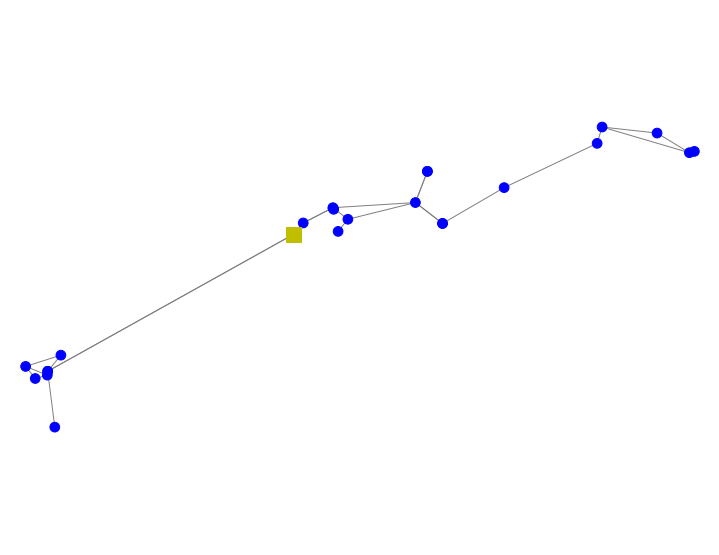

<AxesSubplot:>

In [10]:
#Run Powerflow

#test_line = 13 #Optional n-1 analysis for single line
#net.line.loc[test_line , "in_service"] = False #Optional n-1 analysis - Remove line from service
pp.runpp(net, algorithm='gs'); #Run power flow using gauss-siedel algorithm
#net.line.loc[test_line , "in_service"] = True #Optional n-1 analysis - Return line to service

pplot.simple_plot(net) #plot network

In [11]:
net.res_line #Powerflow line results

,p_from_mw,q_from_mvar,p_to_mw,q_to_mvar,pl_mw,ql_mvar,i_from_ka,i_to_ka,i_ka,vm_from_pu,va_from_degree,vm_to_pu,va_to_degree,loading_percent
0,8.256387e+00,3.960706e+00,-8.216193e+00,-3.992906,4.019356e-02,-0.032200,7.968658e-02,0.080131,0.080131,1.005252,-3.352155,0.997253,-3.721047,22.894590
1,1.674361e+01,8.147347e+00,-1.664624e+01,-8.010620,9.737449e-02,0.136727,1.620372e-01,0.162299,0.162299,1.005252,-3.352155,0.995697,-3.792411,46.371125
2,2.155814e+00,1.013755e+00,-2.153761e+00,-1.094636,2.052525e-03,-0.080881,2.089690e-02,0.021226,0.021226,0.997253,-3.721047,0.995697,-3.792411,6.064458
3,-1.073962e+01,-5.302757e+00,1.083981e+01,5.343129,1.001922e-01,0.040372,1.050639e-01,0.104405,0.105064,0.997253,-3.721047,1.012570,-3.029424,30.018251
4,-1.503981e+01,-7.377282e+00,1.516995e+01,7.531656,1.301330e-01,0.154375,1.447205e-01,0.144264,0.144720,1.012570,-3.029424,1.026991,-2.387855,41.348712
5,8.723345e+00,1.448626e-01,-8.700000e+00,-19.213602,2.334509e-02,-19.068740,7.431420e-02,0.181192,0.181192,1.026991,-2.387855,1.018273,-2.686771,25.165575
6,4.593901e+01,-7.634767e+01,-4.540170e+01,-94.622234,5.373116e-01,-170.969908,3.700544e-01,0.444343,0.444343,1.053156,-0.323159,1.033077,-2.137859,67.324753
7,4.593901e+01,-7.634767e+01,-4.540170e+01,-94.622234,5.373116e-01,-170.969908,3.700544e-01,0.444343,0.444343,1.053156,-0.323159,1.033077,-2.137859,67.324753
8,1.193699e+02,4.318247e+01,-1.191764e+02,-43.378792,1.934591e-01,-0.196323,3.172690e-01,0.317905,0.317905,1.050000,0.000000,1.046950,-0.203164,29.710763
9,9.904965e+00,-2.355946e+00,-9.901738e+00,0.375373,3.226811e-03,-1.980573,2.552077e-02,0.024843,0.025521,1.046950,-0.203164,1.046747,-0.257662,2.385118


In [12]:
net.res_bus #Powerflow bus results

,vm_pu,va_degree,p_mw,q_mvar
0,1.005252,-3.352155,-25.000000,-12.108053
1,0.997253,-3.721047,16.800000,8.281908
2,0.995697,-3.792411,18.800000,9.105256
3,1.012570,-3.029424,4.200000,2.034153
4,1.026991,-2.387855,63.900000,30.948182
5,1.033077,-2.137859,0.000000,150.000000
6,1.018273,-2.686771,8.700000,19.213602
7,1.050000,0.000000,-214.576477,103.747578
8,1.053156,-0.323159,0.000000,0.000000
9,1.046880,-1.258740,0.000000,0.000000


In [13]:
#Export results

#Comine bus and bus results dataframes to display names and inputs alongside outputs
df_bus = pd.concat([net.bus , net.res_bus], axis=1, sort=False)
df_bus.to_csv('results_bus_pk{}_pf{}.csv'.format(peak,PF))

#Comine line and line results dataframes to display names and inputs alongside outputs
df_line = pd.concat([net.line , net.res_line], axis=1, sort=False)
df_line.to_csv('results_line_pk{}_pf{}.csv'.format(peak,PF))

#Full Powerflow results
pp.to_excel(net, 'pp_res_pk{}_pf{}.xlsx'.format(peak,PF))

In [14]:
#Print key results

#maximum line loading
line_max_pct = net.res_line["loading_percent"].max()
print("Maximum Line Load Percentage is {}% for {}".format(round(line_max_pct,1),df_line.loc[df_line['loading_percent'] == line_max_pct, 'name'].item()))

#maximum bus volt drop
max_vd = net.res_bus["vm_pu"].min()
print("Maximum volt drop is at {} receiving {}% of rated voltage".format(df_bus.loc[df_bus['vm_pu'] == max_vd, 'name'].item(), round(max_vd*100,1)))

Maximum Line Load Percentage is 69.2% for Son Reus PS - Son Reus
Maximum volt drop is at Sant Jordi Substation receiving 99.6% of rated voltage
